## Project Overview 

The workflow for this project is as follows:

1. **Data Ingestion & Storage**: Created a table in Snowflake and imported the CSV dataset.
2. **Initial Cleaning & Exploration**: Performed basic cleaning and filtering in SQL to prepare the data for analysis.
3. **Preliminary Visualization**: Imported the cleaned data into Tableau from Snowflake to create an initial dashboard and get a high-level view of the data, which helped identify trends and potential outliers.

4. **Outlier Detection & EDA in Python**: Observing some outliers during SQL filtering, the dataset was imported into Python for deeper exploratory data analysis. This includes box plots, distribution checks, and further investigation to better understand the data and any anomalies.


**Import Libraries**

In [3]:
import os
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")
from snowflake.connector.pandas_tools import write_pandas

**Connect to Snowflake**

In [4]:
import snowflake.connector as sf
load_dotenv()
conn = sf.connect(
        user=os.getenv("SNOWFLAKE_USER"),
        password=os.getenv("SNOWFLAKE_PASSWORD"),
        account=os.getenv("SNOWFLAKE_ACCOUNT"),
        warehouse=os.getenv("SNOWFLAKE_WAREHOUSE"),
        project=os.getenv("SNOWFLAKE_DATABASE"),
        schema=os.getenv("SNOWFLAKE_SCHEMA")
        )

In [5]:
table=conn.cursor()
table.execute("SELECT * FROM PROJECT.PUBLIC.CLEANING")
df=table.fetch_pandas_all()
table.close()
conn.close()

In [6]:
df.sample(7)

,TRIP_DURATION,DISTANCE_TRAVELED,NUM_OF_PASSENGERS,FARE,TIP,MISCELLANEOUS_FEES,TOTAL_FARE,SURGE_APPLIED
62138,627,4,2,75,17,10,102,0
42715,2133,12,5,210,0,30,240,1
108959,175,1,1,34,4,7,44,0
91942,682,4,1,83,0,55,138,0
25875,1097,4,1,98,0,10,107,0
63200,1165,7,1,124,0,10,134,0
54949,352,1,1,45,15,6,66,0


In [7]:
df.describe()

,TRIP_DURATION,DISTANCE_TRAVELED,NUM_OF_PASSENGERS,FARE,TIP,MISCELLANEOUS_FEES,TOTAL_FARE,SURGE_APPLIED
count,156259.000000,156259.000000,156259.000000,156259.000000,156259.000000,156259.00000,156259.000000,156259.000000
mean,1397.269802,6.039998,1.378461,112.882893,15.461426,17.14666,145.335827,0.345836
std,5483.793448,145.032941,1.038288,90.768419,21.736842,13.43374,103.828746,0.475642
min,1.000000,1.000000,1.000000,0.000000,0.000000,-1.00000,1.000000,0.000000
25%,537.000000,2.000000,1.000000,64.000000,0.000000,6.00000,85.000000,0.000000
50%,831.000000,4.000000,1.000000,90.000000,13.000000,13.00000,120.000000,0.000000
75%,1260.000000,7.000000,1.000000,135.000000,23.000000,27.00000,174.000000,1.000000
max,86387.000000,57284.000000,9.000000,4466.000000,2500.000000,435.00000,4472.000000,1.000000


**"The Standard deviation** is very high in **Trip_duration (5483.793448) and Distance Travelled (145.032941)** compared to other columns indicating the presence of *Outliers* in the data.this also becomes more likey as we check the min and max and the average of both of the variables**

**TRIP_DURATION**
mean 1397.269802
min	1.000000
max	86387.000000

**DISTANCE TRAVELLED**
mean 6.039998	
min 1.000000
max 57284.000000






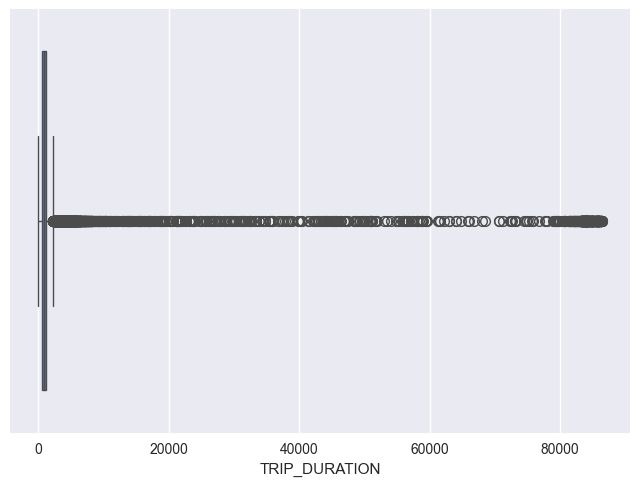

In [8]:
sns.boxplot(x="TRIP_DURATION",data=df)
plt.show()

In [9]:
df[df["TRIP_DURATION"]>10000]

,TRIP_DURATION,DISTANCE_TRAVELED,NUM_OF_PASSENGERS,FARE,TIP,MISCELLANEOUS_FEES,TOTAL_FARE,SURGE_APPLIED
48,85740,1,1,53,0,2,55,0
238,43353,9,1,150,0,76,226,1
465,72351,3,1,68,0,10,77,0
511,21383,15,1,266,0,27,293,1
1338,82990,2,1,38,8,9,55,0
...,...,...,...,...,...,...,...,...
155518,84981,1,2,30,16,10,56,0
155545,50083,4,1,83,0,6,89,0
155663,80639,2,1,53,9,10,72,0
156070,83749,4,1,113,18,6,136,0


In [10]:
df.drop(df[df["TRIP_DURATION"]>10000].index,inplace=True)

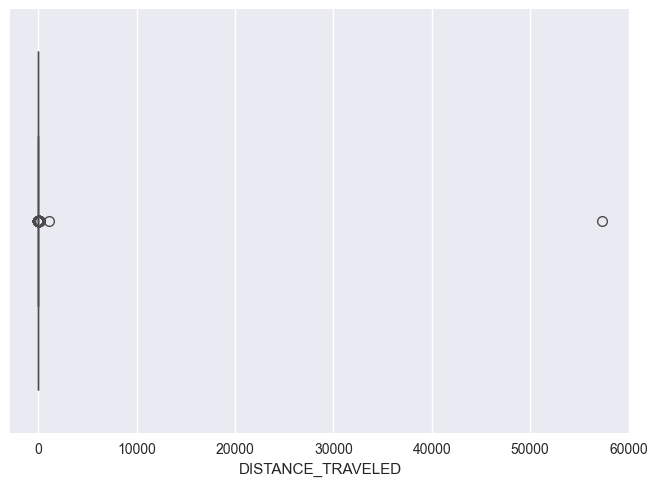

In [11]:
sns.boxplot(x="DISTANCE_TRAVELED",data=df)
plt.show()

WE SEE THAT THERE ARE OUTLIERS IN THE DATA BETWEEN 50000 and 60000

In [12]:
df[df["DISTANCE_TRAVELED"]>50000]

,TRIP_DURATION,DISTANCE_TRAVELED,NUM_OF_PASSENGERS,FARE,TIP,MISCELLANEOUS_FEES,TOTAL_FARE,SURGE_APPLIED
96622,1734,57284,1,187,20,51,258,0


In [13]:
df.drop(df[df["DISTANCE_TRAVELED"]>50000].index,inplace=True)

After Dealing with outliers i wanted to check if there was a relationship between certain variables in the data

In [14]:
df.columns

Index(['TRIP_DURATION', 'DISTANCE_TRAVELED', 'NUM_OF_PASSENGERS', 'FARE',
       'TIP', 'MISCELLANEOUS_FEES', 'TOTAL_FARE', 'SURGE_APPLIED'],
      dtype='object')

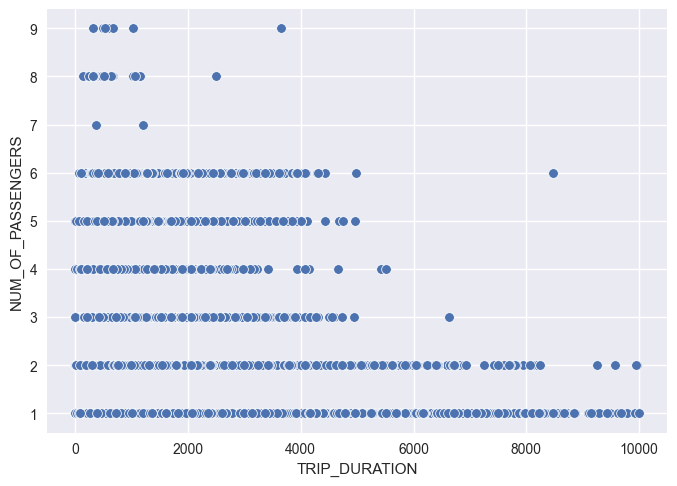

In [15]:
sns.scatterplot(data=df,x="TRIP_DURATION",y="NUM_OF_PASSENGERS")
plt.show()

In [16]:
corr=df["TRIP_DURATION"].corr(df["NUM_OF_PASSENGERS"])
print(corr)

-0.0436101537155758


**We see a negative correlation between the trip duration and number of passengers meaning that people arent necessarily grouping to take longer rides**

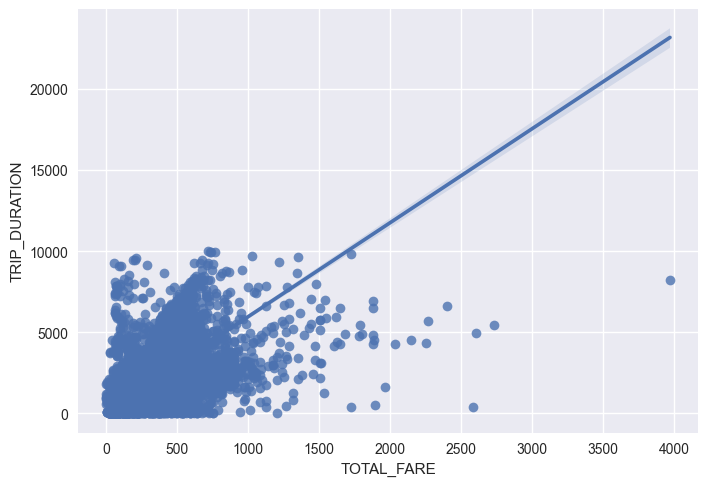

In [17]:
sns.regplot(data=df,x="TOTAL_FARE",y="TRIP_DURATION")
plt.show()

*There is a general increase in the total ride fare as the duration of the trip climbs*

<Axes: xlabel='TOTAL_FARE', ylabel='DISTANCE_TRAVELED'>

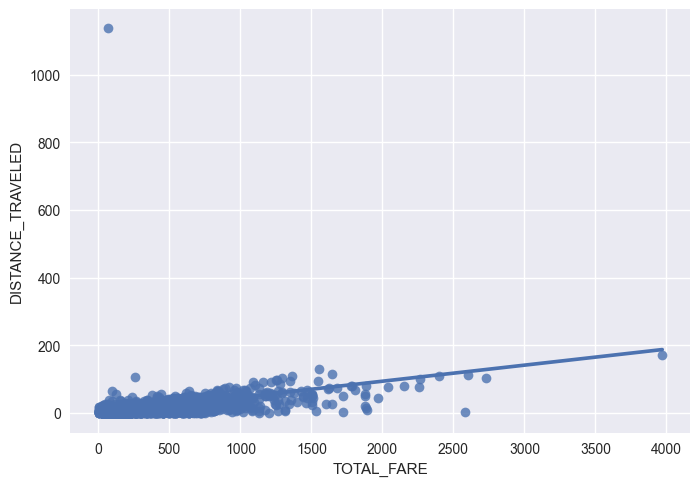

In [18]:
sns.regplot(data=df,x="TOTAL_FARE",y="DISTANCE_TRAVELED")

*We can also see that the previous observation is true for Distance Traveled*

In [19]:
df["SURGE_APPLIED"].value_counts()

SURGE_APPLIED
0    101509
1     53808
Name: count, dtype: int64

<Axes: xlabel='SURGE_APPLIED'>

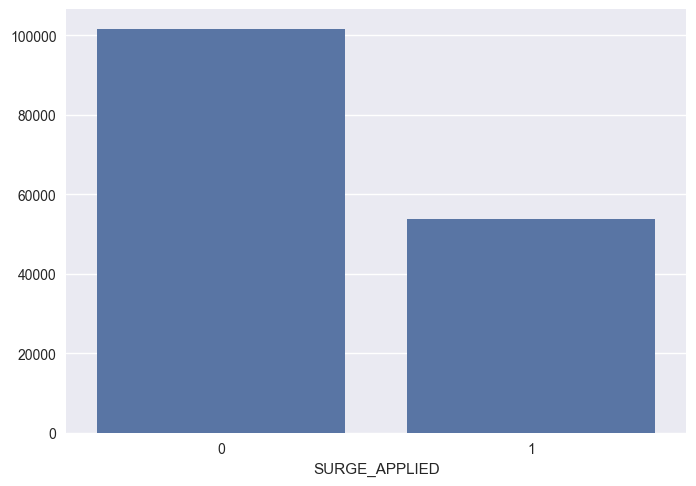

In [20]:
sns.barplot(
    x=df["SURGE_APPLIED"].value_counts().index,
    y=df["SURGE_APPLIED"].value_counts().values,

)


Surge Pricing was Applied about a quarter of the time

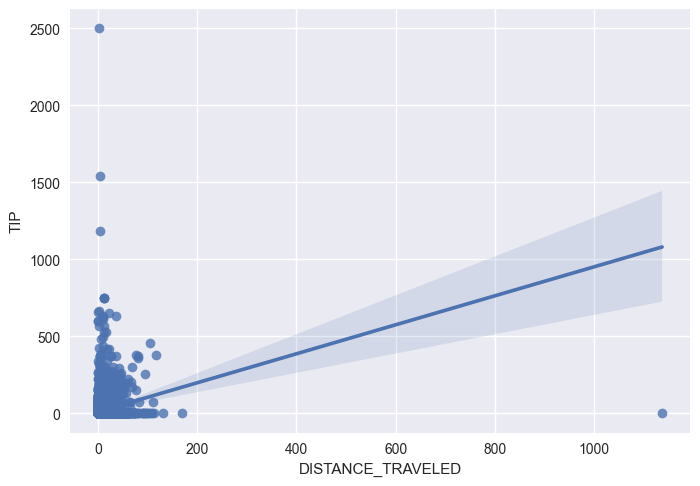

In [21]:
sns.regplot(data=df,y="TIP",x="DISTANCE_TRAVELED")
plt.show()

Most people gave tips under 1000 but we see that three people gave tips more than 1000

In [22]:
corr=df.corr()

<Axes: >

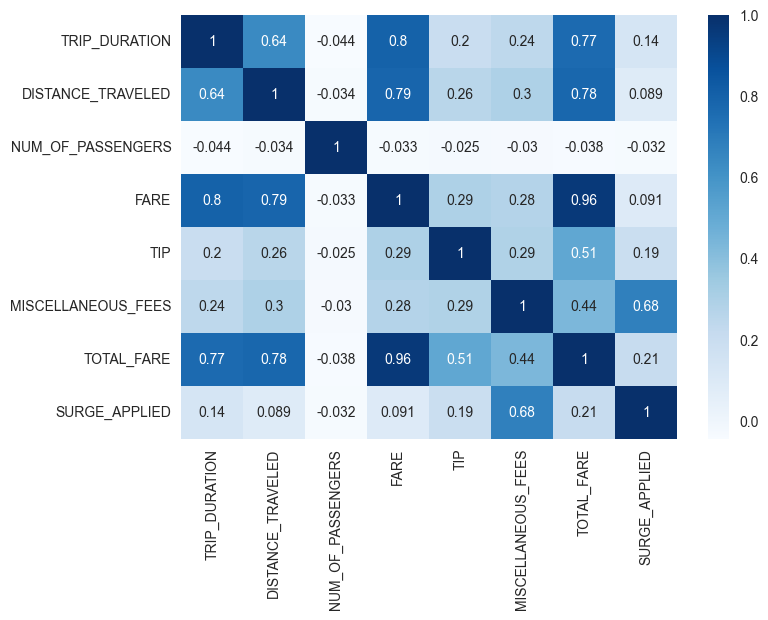

In [23]:
sns.heatmap(corr,annot=True,cmap="Blues")

In [27]:
df.to_csv("../data/clean.csv")